<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment4April4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction Model


Data Description


The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.
This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv, is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. There is class imbalance in this dataset. This dataset has 21 feature variables
0 is for No Diabetes or only during pregnancy
1 is for Prediabetes, and
2 is for Diabetes.
Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance):
Blood Pressure (high)
Cholesterol (high)
Smoking
Diabetes
Obesity
Age
Sex
Race
Diet
Exercise
Alcohol Consumption
BMI
Household Income
Marital Status
Sleep
Time since last checkup
Education
Health Care Coverage
Mental Health
Here, Diabetes_012 is our target variable and we will try to predict whether a person has diabetes or not based on the 21 features using bagging, specifically the Random Forest algorithm, which is an ensemble method based on bagging.




Conclusion


: The accuracy of the classifier on the validation set is approximately 0.848 or . This metric measures the overall correctness of the classifier's predictions.: The classification report provides additional metrics such as precision, recall, and F1-score for each class. Here's a breakdown:
For Class 0 (Non-diabetic):
Precision is approximately 0.86, which means that among the instances predicted as class 0,
Recall is approximately 0.98, which means that among all the actual class 0.0 instances,
, which is the harmonic mean of precision and recall.
For Class 1 (Pre-diabetic):
Precision is 0.0, which means that  This might indicate an issue with class imbalance or data quality.
Recall is 0.0, indicating that
For class 2.0 (Diabetec):
Precision is approximately 0.56, indicating that
Recall is approximately 0.16, indicating that
: The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each class. It allows you to see how the classifier's predictions match with the actual classes.
For Class 0: There are 41,884 true positives (correctly predicted), 0 false positives, and 820 false negatives.
For Class 1: There are 0 true positives, 0 false positives, and 941 false negatives.
For Class 2: There are 1,132 true positives, 0 false positives, and 5,959 false negatives.
The "UndefinedMetricWarning" indicates that precision and F1-score are ill-defined for Class 1 because there are no predicted samples for this class, likely due to a lack of Class 1 instances in the validation set or an issue with class imbalance.
Overall, the model appears to perform well for Class 0 but struggles with Class 1, possibly due to data imbalance or data quality issues for that class. Further analysis and data preprocessing may be needed to improve performance on Class 1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
print('diabetes_012_health_indicators_BRFSS2015-diabetes_012_health_indicators_BRFSS2015.csv')

diabetes_012_health_indicators_BRFSS2015-diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
Diabetes_data=pd.read_csv('diabetes_012_health_indicators_BRFSS2015 - diabetes_012_health_indicators_BRFSS2015.csv')
Diabetes_data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
Diabetes_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
Diabetes_data['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [6]:
#num_duplicates = Diabetes_data.duplicated().sum()

#print("Number of duplicate rows:", num_duplicates)

In [7]:
#Diabetes_data.drop_duplicates(inplace=True)

In [8]:
correlation=Diabetes_data.corr()['Diabetes_012'].drop('Diabetes_012')
correlation

HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
PhysActivity           -0.121947
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
GenHlth                 0.302587
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Sex                     0.031040
Age                     0.185026
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

In [9]:
X=Diabetes_data.drop(columns='Diabetes_012')
y=Diabetes_data['Diabetes_012']

In [10]:
oversampler=SMOTE()
X_res, y_res = oversampler.fit_resample(X, y)


In [11]:
X_res.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [12]:
y_res.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
randfrt=RandomForestClassifier()
randfrt.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_pred=randfrt.predict(X_test)
print(f'The predictions of the diabetic:{y_pred}')


The predictions of the diabetic:[2 1 1 ... 2 2 1]


In [15]:
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.8952675827861053

In [16]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84     42688
           1       0.97      0.98      0.97     42676
           2       0.83      0.91      0.87     42858

    accuracy                           0.90    128222
   macro avg       0.90      0.90      0.89    128222
weighted avg       0.90      0.90      0.89    128222



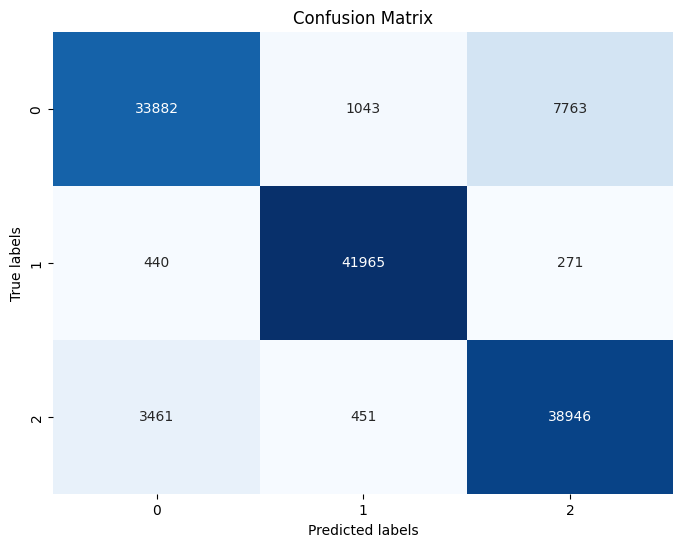

In [17]:
matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()